#### Stochastic oscillator
*Gene product G1 activates the production of gene product G2; G2 activates G3, G3 represses G1* \
\
$G_1$ &rarr; $G_1+1$ at a rate $[\frac{\ c^n}{\ c^n + G_3^n}]k_1$ \
$G_1$ &rarr; $G_1-1$ at a rate $\gamma_1 G_1$  

$G_2$ &rarr; $G_2+1$ at a rate $[\frac{\ G_1^n}{\ c^n + G_1^n}]k_2$ \
$G_2$ &rarr; $G_2-1$ at a rate $\gamma_2 G_2$ 

$G_3$ &rarr; $G_3+1$ at a rate $[\frac{\ G_2^n}{\ c^n + G_2^n}]k_3$ \
$G_3$ &rarr; $G_3-1$ at a rate $\gamma_3 G_3$

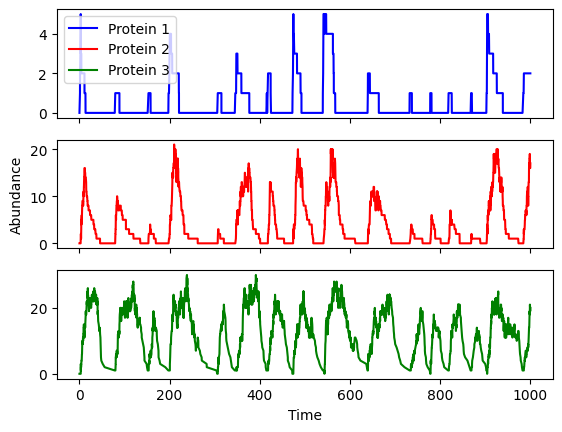

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

G1 = [0]
G2 = [0]
G3 = [0]
t = [0]

t_end = 1000

k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

while t[-1] < t_end:
    
    currentG1 = G1[-1]
    currentG2 = G2[-1]
    currentG3 = G3[-1]

    rates = [(c**n / (c**n + currentG3**n)) * k_1, gamma_1 * currentG1, \
    (currentG1**n / (c**n + currentG1**n)) * k_2, gamma_2 * currentG2, \
    (currentG2**n / (c**n + currentG2**n)) * k_3, gamma_3 * currentG3]
    
    ratesum = sum(rates)

    tau = np.random.exponential(scale=1/ratesum)

    t.append(t[-1] + tau)

    rand = random.uniform(0,1)

    if rand*ratesum <= rates[0]:    # G1 production event
        G1.append(G1[-1] + 1)
        G2.append(G2[-1])
        G3.append(G3[-1])
    
    elif rand*ratesum > rates[0] and rand*ratesum <= sum(rates[:2]):    # G1 decay event
        G1.append(G1[-1]-1)
        G2.append(G2[-1])
        G3.append(G3[-1])

    elif rand*ratesum > sum(rates[:2]) and rand*ratesum <= sum(rates[:3]):
        G1.append(G1[-1])
        G2.append(G2[-1]+1)
        G3.append(G3[-1])

    elif rand*ratesum > sum(rates[:3]) and rand*ratesum <= sum(rates[:4]):
        G1.append(G1[-1])
        G2.append(G2[-1]-1)
        G3.append(G3[-1])

    elif rand*ratesum > sum(rates[:4]) and rand*ratesum <= sum(rates[:5]):
        G1.append(G1[-1])
        G2.append(G2[-1])
        G3.append(G3[-1]+1)

    elif rand*ratesum > sum(rates[:5]) and rand*ratesum <= sum(rates[:6]):
        G1.append(G1[-1])
        G2.append(G2[-1])
        G3.append(G3[-1]-1)
    
f,(ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)

g1, = ax1.plot(t, G1, 'b', label="Protein 1")
g2, = ax2.plot(t, G2, 'r', label="Protein 2")
g3, = ax3.plot(t, G3, 'g', label="Protein 3")

ax3.set_xlabel('Time')
ax2.set_ylabel('Abundance')

ax1.legend(handles=[g1,g2,g3])

plt.show()
